In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
df = pd.read_csv('/home/negi/Desktop/kyphosis.csv')

In [9]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [10]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


/home/negi/negi/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


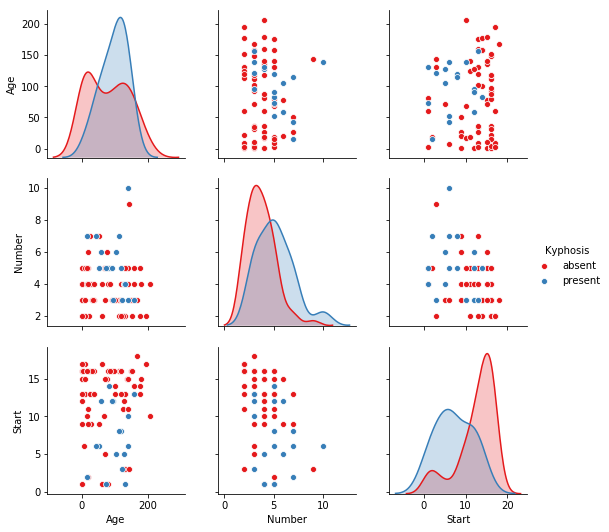

In [11]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X = df.drop('Kyphosis',axis=1)
print(X)
y = df['Kyphosis']
print(y)

    Age  Number  Start
0    71       3      5
1   158       3     14
2   128       4      5
3     2       5      1
4     1       4     15
5     1       2     16
6    61       2     17
7    37       3     16
8   113       2     16
9    59       6     12
10   82       5     14
11  148       3     16
12   18       5      2
13    1       4     12
14  168       3     18
15    1       3     16
16   78       6     15
17  175       5     13
18   80       5     16
19   27       4      9
20   22       2     16
21  105       6      5
22   96       3     12
23  131       2      3
24   15       7      2
25    9       5     13
26    8       3      6
27  100       3     14
28    4       3     16
29  151       2     16
..  ...     ...    ...
51    9       2     17
52  139      10      6
53    2       2     17
54  140       4     15
55   72       5     15
56    2       3     13
57  120       5      8
58   51       7      9
59  102       3     13
60  130       4      1
61  114       7      8
62   81    

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
predictions = dtree.predict(X_test)


In [19]:
from sklearn.metrics import classification_report,confusion_matrix


In [20]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

      absent       0.80      0.89      0.84        18
     present       0.60      0.43      0.50         7

   micro avg       0.76      0.76      0.76        25
   macro avg       0.70      0.66      0.67        25
weighted avg       0.74      0.76      0.75        25



In [15]:
print(confusion_matrix(y_test,predictions))


[[19  2]
 [ 0  4]]


In [16]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [17]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

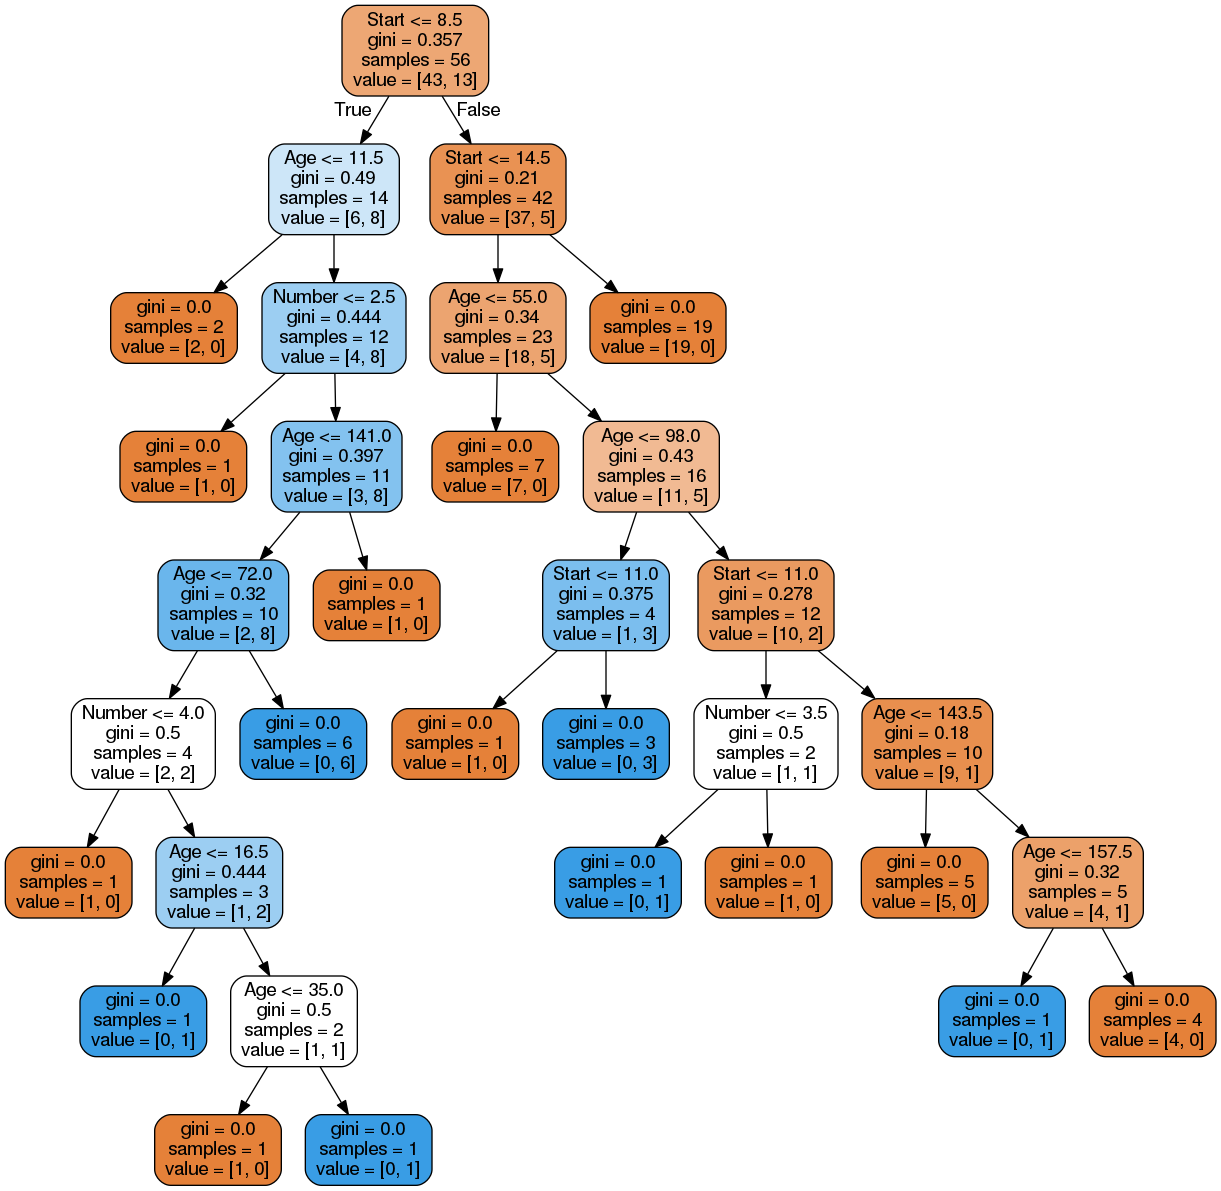

In [18]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  